In [9]:
# !run -p data/synthetic_phenopackets_3500/ -d "Marfan syndrome" --remove-pt-terms-not-in-spo

/var/folders/vc/lfqgrrhn56d9yj5fbxbw6qr00000gt/T/ipykernel_93211/3867211451.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


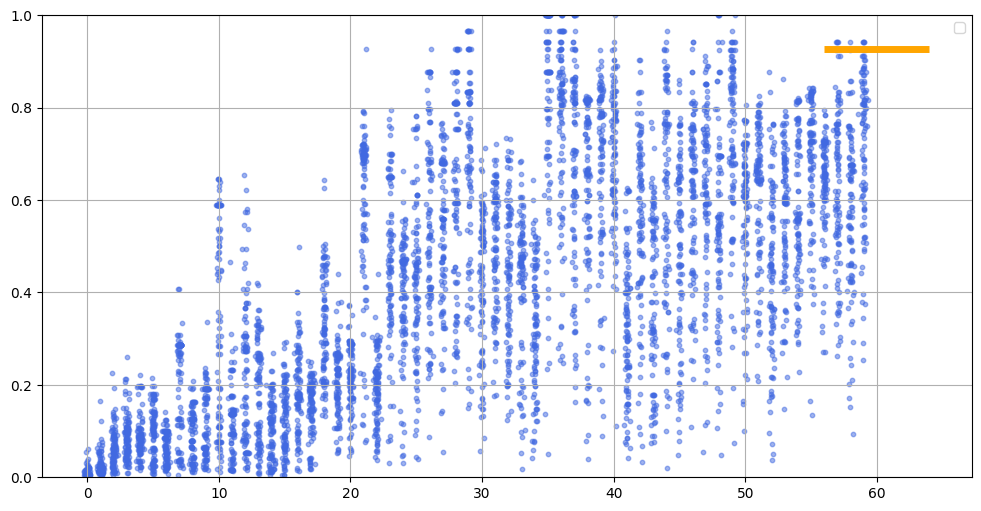

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the TSV file
file_path = 'auprc_by_iteration_Marfan syndrome_60_SYNTHETIC_DATA.tsv'
data = pd.read_csv(file_path, sep='\t')

# Filter the data for the 'train' type
train_data = data[data['type'] == 'train']

# Filter the data for the 'test' type
test_data = data[data['type'] == 'test']

# Extract the test AUPRC at the last iteration present in the data (iteration 60 or max iteration)
last_iteration = test_data['iteration'].max()
test_auprc_end = test_data[test_data['iteration'] == last_iteration]['auprc'].values

# Calculate the highest test AUPRC at the last iteration
max_test_auprc_end = test_auprc_end.max()

# Add a small jitter to the x-axis for the train data
jittered_iterations = train_data['iteration'] + np.random.normal(0, 0.1, len(train_data))

# Plot the data with jittered x-axis
plt.figure(figsize=(12, 6))
plt.scatter(jittered_iterations, train_data['auprc'], alpha=0.5, s=10, color='royalblue')
plt.title('')
plt.ylim(0, 1)
plt.grid(True)

# Add short horizontal lines for test AUPRC at the last iteration
# for auprc in test_auprc_end:
#     plt.hlines(auprc, xmin=last_iteration-0.5, xmax=last_iteration+0.5, colors='orange', linewidth=2)

# Add a short horizontal line for the highest test AUPRC at the last iteration
plt.hlines(max_test_auprc_end, xmin=last_iteration-4, xmax=last_iteration+4, colors='orange', linewidth=5, label='')

# Add a legend to distinguish the lines
plt.legend()

plt.show()